In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!mkdir -p ~/.kaggle
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

Dataset URL: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
License(s): CC0-1.0
 93% 27.0M/28.9M [00:00<00:00, 73.6MB/s]
100% 28.9M/28.9M [00:00<00:00, 64.8MB/s]


In [2]:
!unzip /content/credit-card-fraud.zip

Archive:  /content/credit-card-fraud.zip
  inflating: card_transdata.csv      


In [3]:
df = pd.read_csv('/content/card_transdata.csv')

In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
df.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


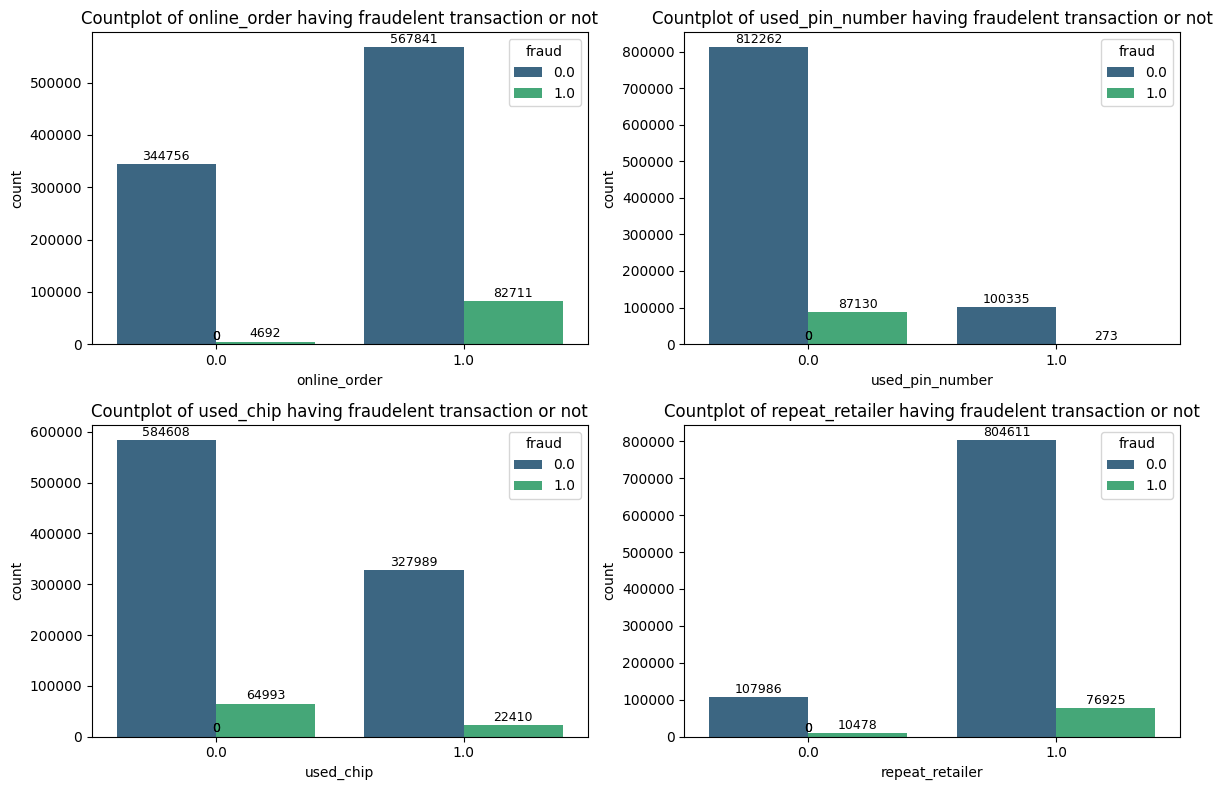

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.countplot(x='online_order', data=df, hue='fraud', palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Countplot of online_order having fraudelent transaction or not')
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='used_pin_number', data=df, hue='fraud', palette='viridis', ax=axes[0,1])
axes[0,1].set_title('Countplot of used_pin_number having fraudelent transaction or not')
for p in axes[0,1].patches:
    axes[0,1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='used_chip', data=df, hue='fraud', palette='viridis', ax=axes[1,0])
axes[1,0].set_title('Countplot of used_chip having fraudelent transaction or not')
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

sns.countplot(x='repeat_retailer', data=df, hue='fraud', palette='viridis', ax=axes[1,1])
axes[1,1].set_title('Countplot of repeat_retailer having fraudelent transaction or not')
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')
plt.tight_layout()
plt.show()

<ipython-input-70-88168c970fba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
<ipython-input-70-88168c970fba>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 0]['dist

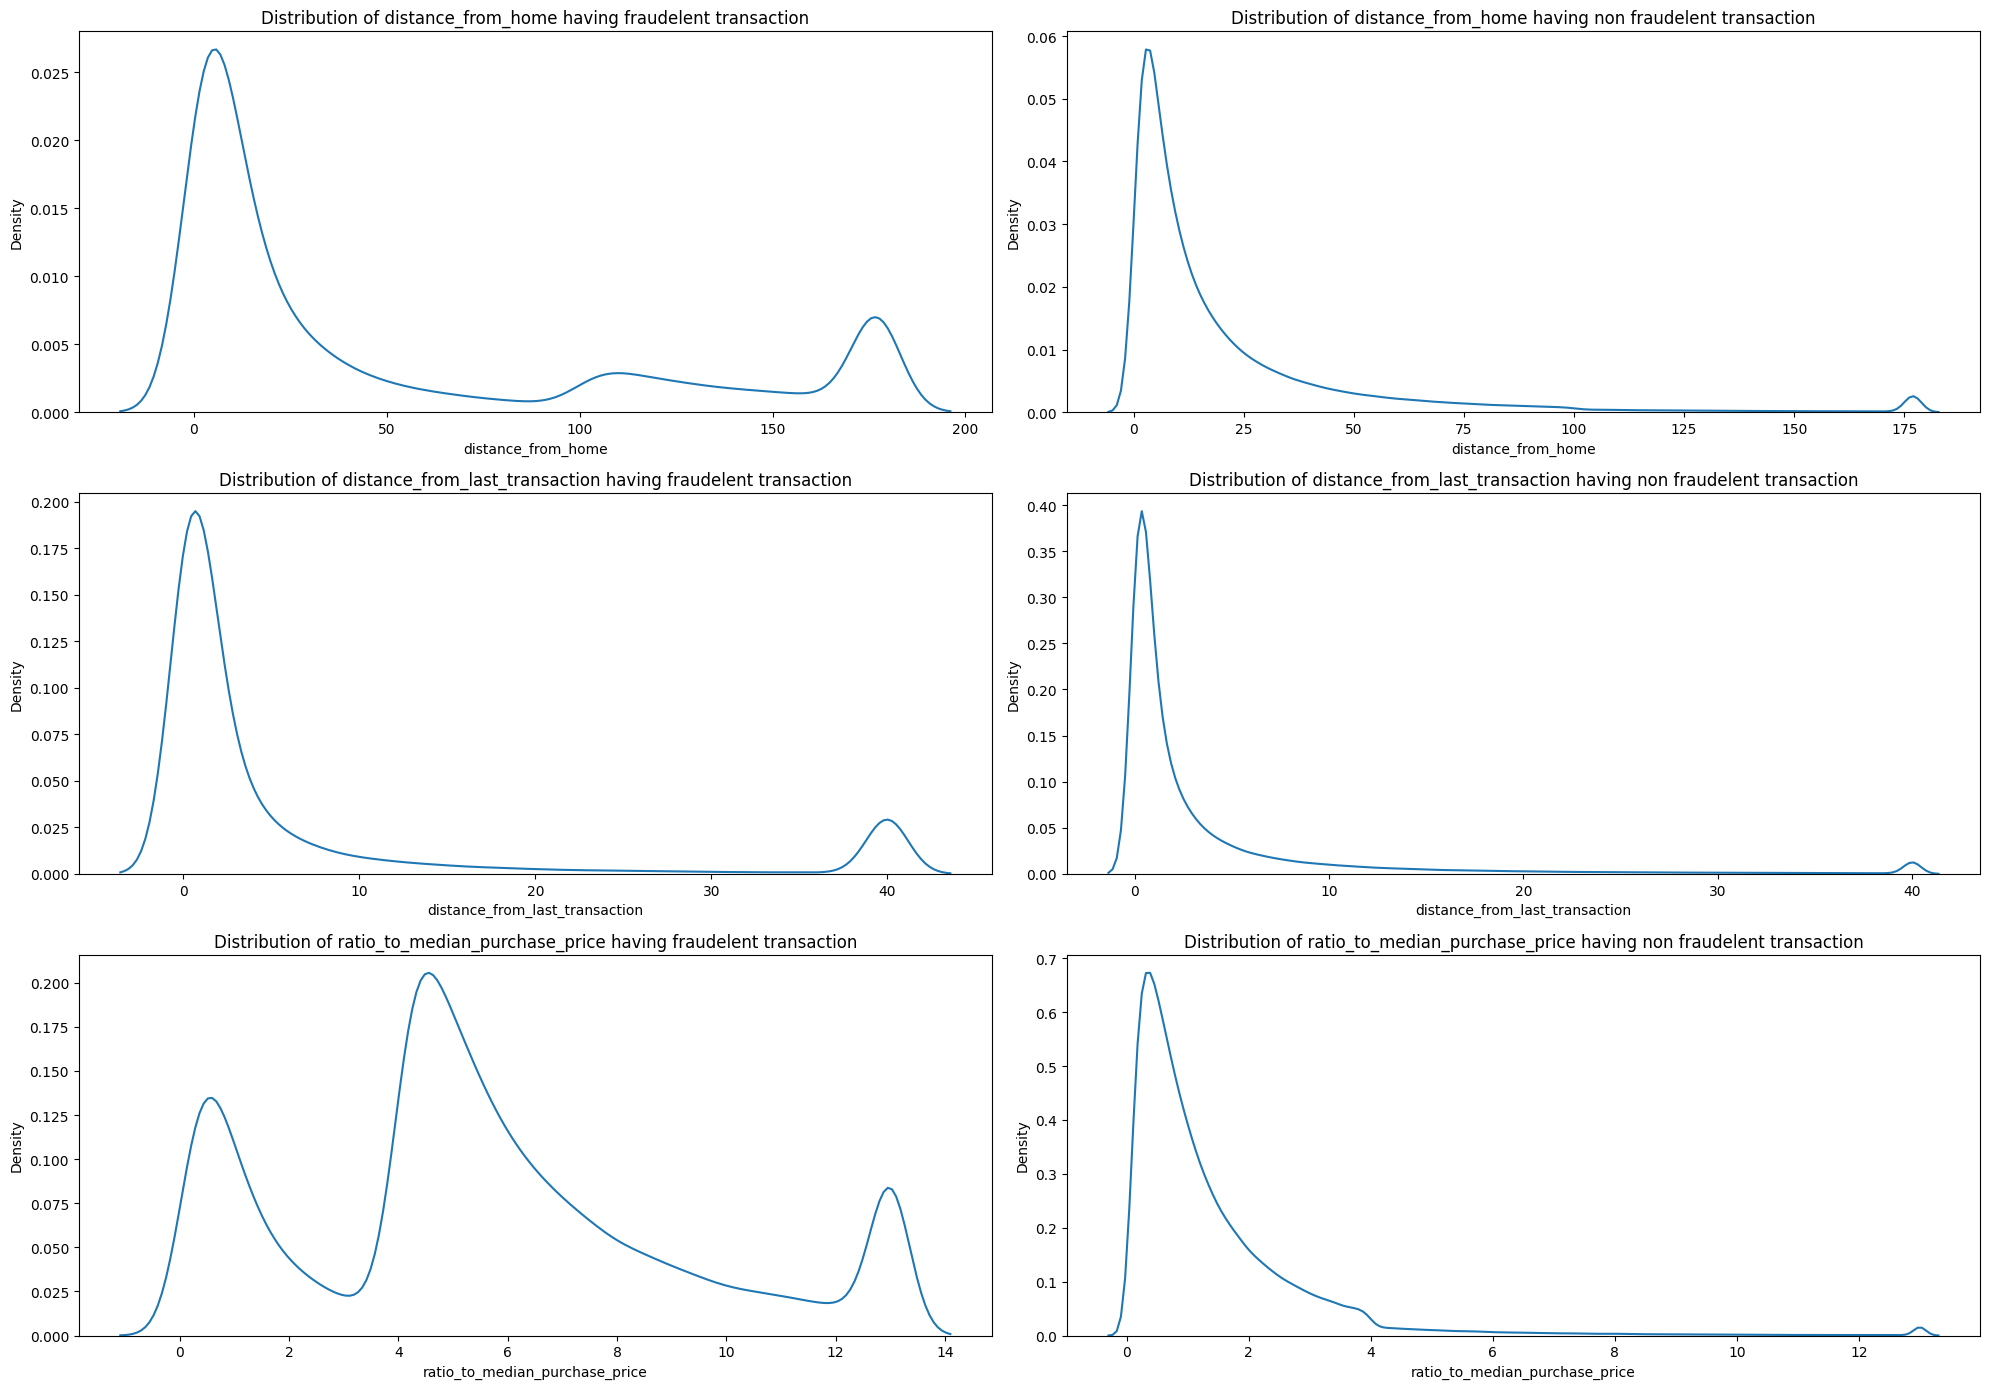

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
sns.distplot(df[df['fraud'] == 1]['distance_from_home'], label = 'Plot 1', hist=False, ax = axes[0,0])
axes[0,0].set_title('Distribution of distance_from_home having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['distance_from_home'], label = 'Plot 2', hist=False, ax = axes[0,1])
axes[0,1].set_title('Distribution of distance_from_home having non fraudelent transaction')

sns.distplot(df[df['fraud'] == 1]['distance_from_last_transaction'], label = 'Plot 3', hist=False, ax = axes[1,0])
axes[1,0].set_title('Distribution of distance_from_last_transaction having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['distance_from_last_transaction'], label = 'Plot 4', hist=False, ax = axes[1,1])
axes[1,1].set_title('Distribution of distance_from_last_transaction having non fraudelent transaction')

sns.distplot(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], label = 'Plot 5', hist=False, ax = axes[2,0])
axes[2,0].set_title('Distribution of ratio_to_median_purchase_price having fraudelent transaction')

sns.distplot(df[df['fraud'] == 0]['ratio_to_median_purchase_price'], label = 'Plot 6', hist=False, ax = axes[2,1])
axes[2,1].set_title('Distribution of ratio_to_median_purchase_price having non fraudelent transaction')

plt.tight_layout()
plt.show()

<ipython-input-50-603f9f05de47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 0]['distance_from_home'], hist=False)


<Axes: xlabel='distance_from_home', ylabel='Density'>

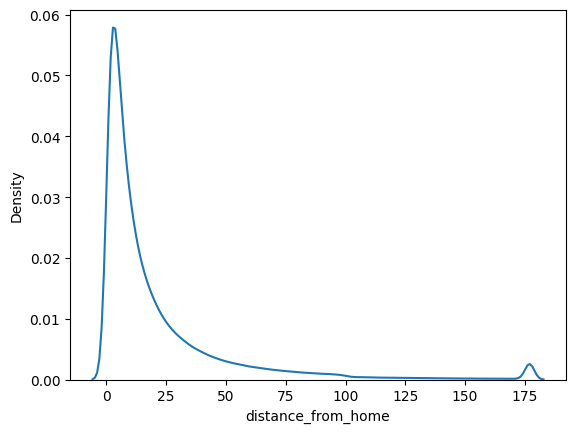

In [50]:
sns.distplot(df[df['fraud'] == 0]['distance_from_home'], hist=False)

<ipython-input-9-2115640ce8c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_home'], hist=False)


<Axes: xlabel='distance_from_home', ylabel='Density'>

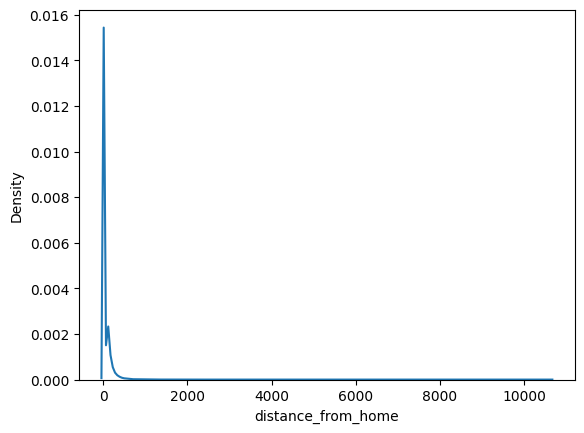

In [9]:
sns.distplot(df[df['fraud'] == 1]['distance_from_home'], hist=False)

<ipython-input-10-0782da34e203>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], hist=False)


<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

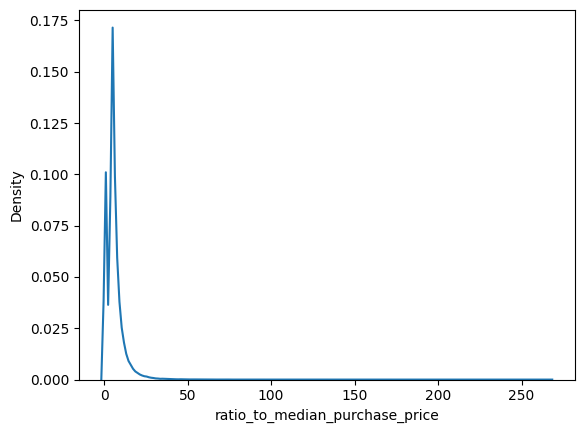

In [10]:
sns.distplot(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], hist=False)

<Axes: ylabel='ratio_to_median_purchase_price'>

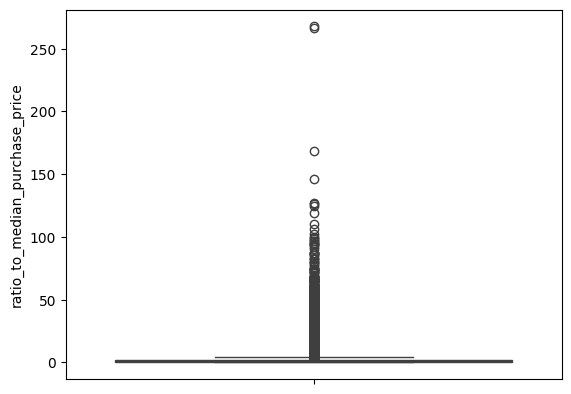

In [11]:
sns.boxplot(df['ratio_to_median_purchase_price'])

<Axes: ylabel='distance_from_home'>

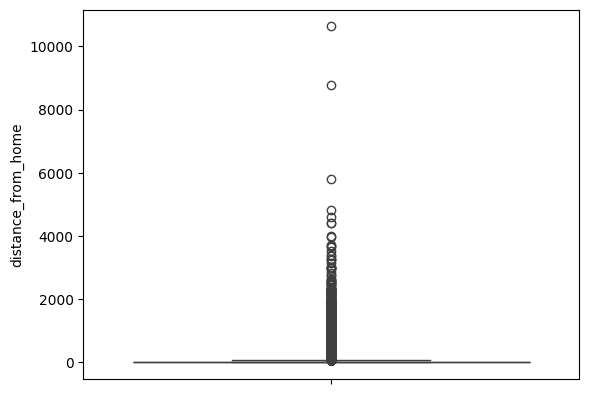

In [12]:
sns.boxplot(df['distance_from_home'])

In [13]:
df[df['distance_from_home'] >= 500]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
261,601.522919,0.028723,0.859779,1.0,0.0,0.0,1.0,1.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0,1.0
568,537.151466,1.639335,1.899462,1.0,0.0,0.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
997070,599.666634,0.075169,0.194894,1.0,1.0,0.0,0.0,0.0
998238,832.526950,0.065645,1.469088,1.0,1.0,0.0,1.0,0.0
998320,1160.674180,1.926613,3.314429,1.0,0.0,0.0,1.0,1.0
998909,521.424992,0.306265,26.258340,1.0,0.0,0.0,1.0,1.0


In [14]:
df[df['distance_from_last_transaction'] >= 50]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
155,3.357481,990.070315,3.157890,1.0,0.0,0.0,0.0,0.0
187,20.141476,116.562477,1.172999,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999703,8.861100,85.627567,5.528836,1.0,1.0,0.0,1.0,1.0
999762,13.366239,51.944082,0.507591,1.0,1.0,0.0,1.0,0.0
999832,30.068841,53.257849,3.728376,1.0,0.0,1.0,0.0,0.0
999869,58.359075,210.755452,1.778183,1.0,0.0,0.0,1.0,1.0


In [15]:
df['distance_from_home'].quantile(0.98)

177.42540452162518

In [16]:
df['distance_from_last_transaction'].quantile(0.98)

40.086181050792014

In [17]:
df['ratio_to_median_purchase_price'].quantile(0.99)

12.794085597651492

In [18]:
df['distance_from_home'] = np.where(df['distance_from_home'] >= 177, 177, df['distance_from_home'])
df['distance_from_last_transaction'] = np.where(df['distance_from_last_transaction'] >= 40, 40, df['distance_from_last_transaction'])

In [19]:
df['ratio_to_median_purchase_price'] = np.where(df['ratio_to_median_purchase_price'] >= 13, 13, df['ratio_to_median_purchase_price'])

In [20]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [21]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,23.332962,3.818179,1.754288,0.881536,0.350399,0.100608,0.650552,0.087403
std,35.046347,7.530770,2.177631,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,177.000000,40.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-22-2115640ce8c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_home'], hist=False)


<Axes: xlabel='distance_from_home', ylabel='Density'>

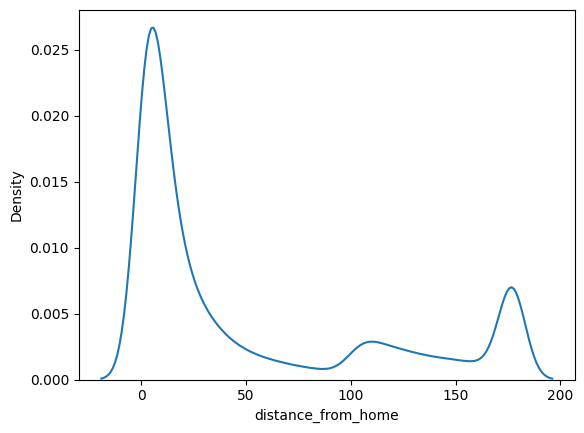

In [22]:
sns.distplot(df[df['fraud'] == 1]['distance_from_home'], hist=False)

<ipython-input-23-30b635e7c379>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud'] == 1]['distance_from_last_transaction'], hist=False)


<Axes: xlabel='distance_from_last_transaction', ylabel='Density'>

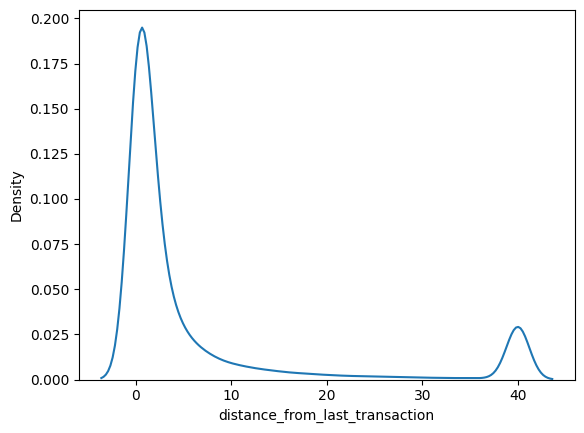

In [23]:
sns.distplot(df[df['fraud'] == 1]['distance_from_last_transaction'], hist=False)

<ipython-input-24-df89f0206425>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ratio_to_median_purchase_price'], hist=False)


<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

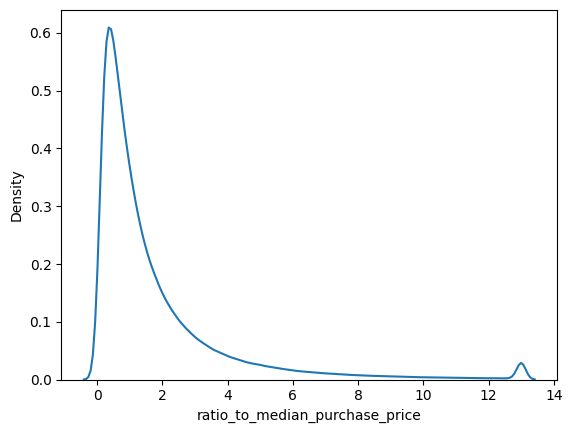

In [24]:
sns.distplot(df['ratio_to_median_purchase_price'], hist=False)

In [25]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rfc = rfc.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred_rfc))

0.997105


In [30]:
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[182143    414]
 [   165  17278]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.98      0.99      0.98     17443

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000



In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
X_test_scaled = scaler.transform(X_test[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])

In [32]:
X_train_lr = np.concatenate((X_train_scaled, X_train.drop(['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'], axis=1)), axis=1)
X_test_lr = np.concatenate((X_test_scaled, X_test.drop(['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'], axis=1)), axis=1)

In [33]:
X_train_lr

array([[ 0.36834662, -0.47428866, -0.72222901, ...,  1.        ,
         0.        ,  1.        ],
       [-0.07554228, -0.4310906 , -0.50090974, ...,  1.        ,
         0.        ,  1.        ],
       [-0.52929178, -0.18990652,  0.81843452, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.08126291, -0.50662384, -0.38543317, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38154183, -0.48488971, -0.26657555, ...,  0.        ,
         0.        ,  1.        ],
       [-0.64583834, -0.17411023, -0.18008821, ...,  1.        ,
         0.        ,  0.        ]])

In [34]:
lr = LogisticRegression()
lr.fit(X_train_lr, y_train)

LogisticRegression()

In [35]:
y_pred_lr = lr.predict(X_test_lr)
print(accuracy_score(y_test, y_pred_lr))

0.962


In [36]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[180189   2368]
 [  5232  12211]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    182557
         1.0       0.84      0.70      0.76     17443

    accuracy                           0.96    200000
   macro avg       0.90      0.84      0.87    200000
weighted avg       0.96      0.96      0.96    200000



In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_lr, y_train)

SVC()

In [38]:
y_pred_svc = svc.predict(X_test_lr)
accuracy_score(y_test, y_pred_svc)

0.99632

In [39]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[181984    573]
 [   163  17280]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.97      0.99      0.98     17443

    accuracy                           1.00    200000
   macro avg       0.98      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

